In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

import gmaps

In [2]:
file_path="AB_NYC_2019.csv"

In [3]:
data=pd.read_csv(file_path)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data_new=data[["neighbourhood_group","neighbourhood","latitude","longitude"]]
bnb_group=data_new.groupby(["neighbourhood"])
bnb_group_new=bnb_group.max() ## get the maximum value of the row
bnb_group_new.head()


,neighbourhood_group,latitude,longitude
neighbourhood,,,
Allerton,Bronx,40.87268,-73.84669
Arden Heights,Staten Island,40.56033,-74.17388
Arrochar,Staten Island,40.59809,-74.06476
Arverne,Queens,40.59910,-73.78665
Astoria,Queens,40.77705,-73.90393


In [5]:
#calculate the occupancy rate of airbnb in certain neighbourhood
data_new_2=data[["neighbourhood_group","neighbourhood","latitude","longitude","availability_365"]]
bnb_group_2=data_new_2.groupby(["neighbourhood"])
avg_availability=bnb_group_2["availability_365"].mean()
new_data_2=pd.DataFrame({"Availibity":avg_availability})
new_data_2=new_data_2.reset_index()
new_data_2.head()


,neighbourhood,Availibity
0,Allerton,163.666667
1,Arden Heights,94.250000
2,Arrochar,255.809524
3,Arverne,188.428571
4,Astoria,109.191111


In [6]:
#transfer the availibity figure to percentage
percentage=100*(new_data_2["Availibity"])/365
neighbourhood=new_data_2["neighbourhood"].unique()
new_data_3=pd.DataFrame({"neighbourhood":neighbourhood,"Availibity (%)":percentage})
new_data_3.head()


,neighbourhood,Availibity (%)
0,Allerton,44.840183
1,Arden Heights,25.821918
2,Arrochar,70.084801
3,Arverne,51.624266
4,Astoria,29.915373


In [7]:

#easy test
new_data_3.loc[214]


neighbourhood     Williamsburg
Availibity (%)          20.472
Name: 214, dtype: object

In [8]:
# count the number of airbnb in every neighborhood
count_airbnb = data_new["neighbourhood"].value_counts()

new_data = pd.DataFrame({"Count":count_airbnb})

new_data=new_data.reset_index()
new_data_renamed=new_data.rename(columns={"index":"neighbourhood"})
new_data_renamed.head()


,neighbourhood,Count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


In [9]:
merge_new_data=new_data_renamed.merge(bnb_group_new, on="neighbourhood")
merge_new_data.head()

,neighbourhood,Count,neighbourhood_group,latitude,longitude
0,Williamsburg,3920,Brooklyn,40.72227,-73.92412
1,Bedford-Stuyvesant,3714,Brooklyn,40.70021,-73.90606
2,Harlem,2658,Manhattan,40.83378,-73.93470
3,Bushwick,2465,Brooklyn,40.70919,-73.90236
4,Upper West Side,1971,Manhattan,40.80449,-73.95847


In [10]:
merge_new_data_2=merge_new_data.merge(new_data_3, on="neighbourhood")
merge_new_data_2.head()

,neighbourhood,Count,neighbourhood_group,latitude,longitude,Availibity (%)
0,Williamsburg,3920,Brooklyn,40.72227,-73.92412,20.471974
1,Bedford-Stuyvesant,3714,Brooklyn,40.70021,-73.90606,31.954692
2,Harlem,2658,Manhattan,40.83378,-73.93470,29.199316
3,Bushwick,2465,Brooklyn,40.70919,-73.90236,26.178332
4,Upper West Side,1971,Manhattan,40.80449,-73.95847,26.461222


In [11]:
merge_new_data_2["Count"].sum()

48895

In [12]:
bnbnew=merge_new_data.groupby(["neighbourhood_group"])
total_bnb=bnbnew["Count"].sum()
bnbnum_df=pd.DataFrame( {"Number of airbnb":total_bnb},index=["Bronx","Brooklyn","Queens","Manhattan","Staten Island"],
                       )
formatted_df=bnbnum_df.sort_values(["Number of airbnb"],ascending=False)
formatted_df

,Number of airbnb
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [13]:
formatted_df["Number of airbnb"].sum()

48895

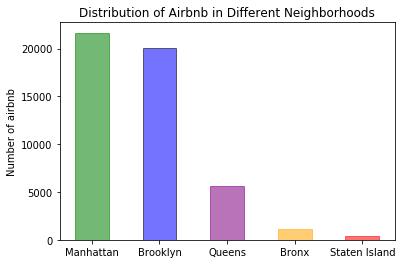

In [38]:
xtick=["Manhattan","Brooklyn","Queens","Bronx","Staten Island"]


for area in xtick:
    formatted_df[area]=formatted_df["Number of airbnb"]
#amount=[(formatted_df[x]) for x in xtick]

chart=plt.bar(xtick,formatted_df[area],width=-0.5,align='center',color="b",alpha=0.55,edgecolor="black")               
plt.ylabel("Number of airbnb")
# plt.grid()
plt.y_lim=(100,25000)
plt.title("Distribution of Airbnb in Different Neighborhoods")

chart[0].set_color("g")
chart[2].set_color("purple")
chart[3].set_color("orange")
chart[4].set_color("r")
plt.savefig("Numbers of airbnb in different area in New York")
plt.show()


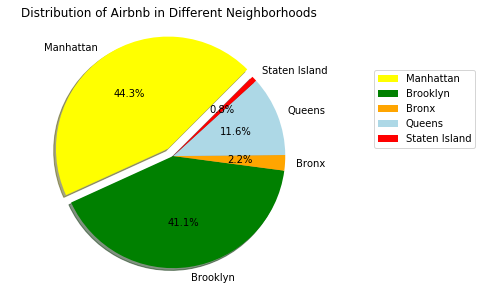

In [83]:
# pies = ["Manhattan","Queens","Staten Island","Brooklyn","Bronx"]
# pie_count = [21661,5666,373,20104,1091]
# colors = ["yellow","lightblue","red","green","orange"]
explode = (0.08,0,0,0,0)
pies = ["Manhattan","Brooklyn","Bronx","Queens","Staten Island"]
pie_count = [21661,20104,1091,5666,373]
colors = ["yellow","green","orange","lightblue","red"]

# Tell matplotlib to create a pie chart based upon the above data
chart=plt.pie(pie_count, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.legend(chart[0],pies, bbox_to_anchor=(1.12,0.5), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.title("Distribution of Airbnb in Different Neighborhoods")
# Save an image of our chart and print the final product to the screen
plt.savefig("BNB pies")
plt.show()

In [43]:
merge_new_data_2

,neighbourhood,Count,neighbourhood_group,latitude,longitude,Availibity (%)
0,Williamsburg,3920,Brooklyn,40.72227,-73.92412,20.471974
1,Bedford-Stuyvesant,3714,Brooklyn,40.70021,-73.90606,31.954692
2,Harlem,2658,Manhattan,40.83378,-73.93470,29.199316
3,Bushwick,2465,Brooklyn,40.70919,-73.90236,26.178332
4,Upper West Side,1971,Manhattan,40.80449,-73.95847,26.461222
5,Hell's Kitchen,1958,Manhattan,40.77180,-73.98285,38.040214
6,East Village,1853,Manhattan,40.73418,-73.97277,20.444891
7,Upper East Side,1798,Manhattan,40.78755,-73.94227,30.903592
8,Crown Heights,1564,Brooklyn,40.68076,-73.90813,26.306975
9,Midtown,1545,Manhattan,40.76811,-73.96088,43.206455


In [16]:
# Store 'Lat' and 'Lng' into  locations 
locations = merge_new_data[["latitude", "longitude"]].astype(float)

count = merge_new_data["Count"].astype(float)
occupancy_rate=merge_new_data_2["Availibity (%)"].astype(float)

In [33]:
# create basic map 
gmaps.configure(api_key=api_key)
new_york_coordinates = (40.75, -74.00)
figure_layout = {
    'width': '400px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px'
}

fig=gmaps.figure(center=new_york_coordinates, zoom_level=12,layout=figure_layout)

fig


Figure(layout=FigureLayout(border='1px solid black', height='400px', padding='1px', width='400px'))

In [42]:
#create occupancy heatmap
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=occupancy_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 0.01


fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
#create count heatmap
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100

heat_layer.point_radius = 0.005


fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
# # Actually no need for this layer
# #create bnb symbol layer
# bnb_layer = gmaps.symbol_layer(
#     locations, fill_color='rgba(0, 150, 0, 0.4)',
#     stroke_color='rgba(0, 0, 150, 0.4)', scale=2)


# fig = gmaps.figure()
# fig.add_layer(bnb_layer)

# fig